### Goals:
* Identify key `numpy` data structures
* Construct `Series` and `DataFrame`
* Understand syntax for attribute access & method calls on these objects
* Apply methods for indexing, data summary, data combination, and grouping
* Use docs to explore functionality

## Agenda (60 min)
* Numpy
* Pandas
* Lab


## Create a new notebook for your code-along:

1. From the `classes/lesson-03` directory, type:
    `jupyter notebook`

2. from the IPython Dashboard, open a new notebook.
3. Change the title to: "Numpy and Pandas"

# Introduction to Numpy

* Overview
* ndarray
* Indexing and Slicing

More info: [http://wiki.scipy.org/Tentative_NumPy_Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)


## Numpy Overview

* *Decades* of C math for Python!
* A wrapper for extensive C/C++/Fortran codebases for highly optimized data analysis functionality
* NDAarray allows easy vectorized math and broadcasting => functions for vector elements of different shapes

### Importing `numpy`

In [2]:
import numpy as np #Load numpy package, assign shorthand; don't skip!

### Creating ndarrays

In [4]:
np.ndarray?

### Numpy offers several ways to create ndarrays:

1- dimensional array of zeros:

In [269]:
a = np.zeros((3))
print a.shape
a

(3,)


array([ 0.,  0.,  0.])

2-dimensional array of 1s:

In [270]:
b = np.ones((2,3))
print b.shape
b

(2, 3)


array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

3-dimensional array of random integers:

In [271]:
c = np.random.randint(1,10,(2,3,4))
print c.shape
c

(2, 3, 4)


array([[[1, 5, 4, 9],
        [6, 2, 8, 3],
        [6, 8, 1, 7]],

       [[4, 3, 7, 2],
        [4, 6, 8, 4],
        [8, 4, 4, 7]]])

1-dimensional array of successive values (with `start`, `stop`, and `step` options):

In [272]:
d = np.arange(start=18,stop=3,step=-1.5)
print d.shape
d

(10,)


array([ 18. ,  16.5,  15. ,  13.5,  12. ,  10.5,   9. ,   7.5,   6. ,   4.5])

In [273]:
# Another way - if surprised, review python prep work!
for data in [a, b, c, d]: # iterate over list of arrays
    print '\n', data


[ 0.  0.  0.]

[[ 1.  1.  1.]
 [ 1.  1.  1.]]

[[[1 5 4 9]
  [6 2 8 3]
  [6 8 1 7]]

 [[4 3 7 2]
  [4 6 8 4]
  [8 4 4 7]]]

[ 18.   16.5  15.   13.5  12.   10.5   9.    7.5   6.    4.5]


### Modifying dimensions

In [274]:
demo = np.arange(24)
print demo.shape
demo

(24,)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

Let's convert our 1-d array into a 2-d array:

In [275]:
demo_2d = demo.reshape(12, -1) # -1 => 'wildcard'
print demo_2d.shape
demo_2d

(12, 2)


array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19],
       [20, 21],
       [22, 23]])

And the 2-d array into a 3-d array:

In [276]:
demo_3d = demo_2d.reshape(-1, 2, 3)
print demo_3d.shape
demo_3d

(4, 2, 3)


array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23]]])

### Array arithmetic: element-wise or broadcast

In [277]:
a = np.array( [20,30,40,50])
print a.shape
a

(4,)


array([20, 30, 40, 50])

In [278]:
b = np.arange( 4 )
print b.shape
b

(4,)


array([0, 1, 2, 3])

In [279]:
c = a-b
c

array([20, 29, 38, 47])

In [280]:
b**2

array([0, 1, 4, 9])

In [281]:
a * b[-1] # What's happening here?

array([ 60,  90, 120, 150])

### Indexing, slicing & iterating
Indexing one-dimensional arrays works like lists:

In [282]:
a = np.arange(10)**2
print a.shape
a

(10,)


array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [283]:
print a[1]
print a[-1]
print a[7:3:-1]

1
81
[49 36 25 16]


Multidimensional arrays use [row,column] indices (or slices):

In [284]:
b = np.random.randint(1,100,(4,4))
print b.shape
b

(4, 4)


array([[77, 97, 79, 18],
       [53, 97,  4, 28],
       [56, 52, 15, 78],
       [38, 91, 81, 15]])

### Guess the output:

In [285]:
b[2,3]

78

In [286]:
b[0,0]

77

In [287]:
b[0:3,1]

array([97, 97, 52])

In [288]:
b[:,1]

array([97, 97, 52, 91])

In [289]:
b[1:3,:]

array([[53, 97,  4, 28],
       [56, 52, 15, 78]])

### Introduction to [Pandas](http://pandas.pydata.org)

* Creating Series & DataFrames
* Indexing / Selection
* Viewing & summarizing data
* Missing data
* Grouping
* Reshaping
* I/O

In [290]:
# import business as usual
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

### Constructing pandas objects
* Underlying data are numpy data structures
* Adds indices (= row & column labels) for selection & alignment
* Designed for mixed data types


#### Series are 1-dimensional objects.

In [291]:
pd.Series(np.arange(30, 10, -3), name='test')

0    30
1    27
2    24
3    21
4    18
5    15
6    12
Name: test, dtype: int64

#### A DataFrame is a 2-dimensional object.

In [292]:
pd.DataFrame(np.random.randint(-100, 100, (5, 3)))

,0,1,2
0,30,-22,28
1,63,-94,69
2,-89,45,-16
3,18,18,-25
4,8,64,5


A DataFrame has `row` and `column` indices.

In [293]:
dates = pd.date_range('20140101',periods=4)
dates[:3]

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03'], dtype='datetime64[ns]', freq='D')

In [294]:
df = pd.DataFrame(data=np.random.randn(4,3),
                  index=dates,
                  columns=list('ABC'))
df

,A,B,C
2014-01-01,-0.663869,-1.224489,-0.965363
2014-01-02,1.013481,-2.697329,-0.217283
2014-01-03,0.801649,0.612565,0.093180
2014-01-04,-1.885848,0.126863,0.356062


A DataFrame can contain various data types:

In [295]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : 'foo' })
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


With specific `dtypes` attributes:

In [296]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

### Viewing Data

In [297]:
df.head(3)

,A,B,C
2014-01-01,-0.663869,-1.224489,-0.965363
2014-01-02,1.013481,-2.697329,-0.217283
2014-01-03,0.801649,0.612565,0.093180


In [298]:
df.tail(2)

,A,B,C
2014-01-03,0.801649,0.612565,0.093180
2014-01-04,-1.885848,0.126863,0.356062


In [299]:
df.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04'], dtype='datetime64[ns]', freq='D')

In [300]:
df.columns

Index([u'A', u'B', u'C'], dtype='object')

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2014-01-01 to 2014-01-04
Freq: D
Data columns (total 4 columns):
A    4 non-null float64
B    4 non-null float64
C    4 non-null float64
D    3 non-null float64
dtypes: float64(4)
memory usage: 160.0 bytes



### Selection / Indexing

In [302]:
print(df['A'])
type(df['A'])

2014-01-01   -0.663869
2014-01-02    1.013481
2014-01-03    0.801649
2014-01-04   -1.885848
Freq: D, Name: A, dtype: float64


pandas.core.series.Series

In [303]:
print(df[['A']])
type(df[['A']])

                   A
2014-01-01 -0.663869
2014-01-02  1.013481
2014-01-03  0.801649
2014-01-04 -1.885848


pandas.core.frame.DataFrame

### Selecting rows by slicing:

In [304]:
df[1:3]

,A,B,C
2014-01-02,1.013481,-2.697329,-0.217283
2014-01-03,0.801649,0.612565,0.093180


### Selecting rows by label:

In [305]:
print dates[0]
print(df.ix[dates[0]])
df.loc[dates[0]]

2014-01-01 00:00:00
A   -0.663869
B   -1.224489
C   -0.965363
Name: 2014-01-01 00:00:00, dtype: float64


A   -0.663869
B   -1.224489
C   -0.965363
Name: 2014-01-01 00:00:00, dtype: float64

### Selecting on various axes by slice & label

In [306]:
df.loc[:,['A','B']]

,A,B
2014-01-01,-0.663869,-1.224489
2014-01-02,1.013481,-2.697329
2014-01-03,0.801649,0.612565
2014-01-04,-1.885848,0.126863


### Selecting on multiple axes by date range and labels

In [307]:
df.loc['20140102':'20140104',['A', 'C']]

,A,C
2014-01-02,1.013481,-0.217283
2014-01-03,0.801649,0.093180
2014-01-04,-1.885848,0.356062


### iloc: integer-based selection similar to numpy

In [308]:
df.iloc[2, 1:3]

B    0.612565
C    0.093180
Name: 2014-01-03 00:00:00, dtype: float64

### Conditional Selection: Boolean Indexing
Select where one or more columns meet certain conditions

In [309]:
print(df.B>0)
df.loc[df.B>0, :]

2014-01-01    False
2014-01-02    False
2014-01-03     True
2014-01-04     True
Freq: D, Name: B, dtype: bool


,A,B,C
2014-01-03,0.801649,0.612565,0.093180
2014-01-04,-1.885848,0.126863,0.356062


### Conditional Setting

In [310]:
df.loc[df.B > 0, 'C'] = 100
df

,A,B,C
2014-01-01,-0.663869,-1.224489,-0.965363
2014-01-02,1.013481,-2.697329,-0.217283
2014-01-03,0.801649,0.612565,100.000000
2014-01-04,-1.885848,0.126863,100.000000


### Automatic Index alignment
Very important for manipulating data across DataFrame objects!

Example: inserting a Series with overlapping index

In [311]:
#Setting new column aligns data by index
s = pd.Series([1,2,3,4,5,6],index=pd.date_range('20140102',periods=6))
s

2014-01-02    1
2014-01-03    2
2014-01-04    3
2014-01-05    4
2014-01-06    5
2014-01-07    6
Freq: D, dtype: int64

In [312]:
df['D'] = s
df

,A,B,C,D
2014-01-01,-0.663869,-1.224489,-0.965363,NaN
2014-01-02,1.013481,-2.697329,-0.217283,1.0
2014-01-03,0.801649,0.612565,100.000000,2.0
2014-01-04,-1.885848,0.126863,100.000000,3.0


### Missing Data
Data types: `np.NaN`, `np.NaT`, `None`

Methods: 
* `pd.isnull()`, `pd.notnull()` => True/False
* `.dropna(how='any/all', axis=0/1)` => remove rows/columns 

In [313]:
pd.isnull(df) # find where values are null

,A,B,C,D
2014-01-01,False,False,False,True
2014-01-02,False,False,False,False
2014-01-03,False,False,False,False
2014-01-04,False,False,False,False


In [314]:
df.dropna() # remove rows with missing values

,A,B,C,D
2014-01-02,1.013481,-2.697329,-0.217283,1.0
2014-01-03,0.801649,0.612565,100.000000,2.0
2014-01-04,-1.885848,0.126863,100.000000,3.0


### Applying functions
In addition to many built-in functions (that are optimized), we can define and `.apply()` our own functions to pandas objects.

Example: difference between `.max()` and `.min()` for each column

In [319]:
df.apply(lambda x: x.max() - x.min())

A      2.899329
B      3.309894
C    100.965363
D      2.000000
dtype: float64

### Concatenating & Merging
The key difference is alignment:
* on row/column labels: `pd.concat()`, `.append()`, `.join()`
* on values in one or several columns: `.merge()`, `.join()`

In [333]:
dates_2 = pd.date_range(start=dates[-1], periods=4)
df2 = pd.DataFrame(data=np.random.random((4,4)), index=dates_2, columns=list('ABCD') )

In [336]:
pd.concat([df, df2])

,A,B,C,D
2014-01-01,-0.663869,-1.224489,-0.965363,NaN
2014-01-02,1.013481,-2.697329,-0.217283,1.000000
2014-01-03,0.801649,0.612565,100.000000,2.000000
2014-01-04,-1.885848,0.126863,100.000000,3.000000
2014-01-04,0.066259,0.813272,0.814768,0.045971
2014-01-05,0.042440,0.114833,0.493041,0.905903
2014-01-06,0.712681,0.873795,0.815907,0.909908
2014-01-07,0.720346,0.929395,0.674409,0.282344


### Grouping


In [338]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.966988,1.430793
1,bar,one,0.938679,-0.413164
2,foo,two,-0.296255,-0.282996
3,bar,three,0.980449,-0.620745
4,foo,two,1.529623,0.223375
5,bar,two,-2.037976,-0.596151
6,foo,one,-1.771887,0.470171
7,foo,three,1.480710,0.657526


In [344]:
df_grouped = df.groupby(['A','B']).sum()
df_grouped

C         D
A   B                        
bar one    0.938679 -0.413164
    three  0.980449 -0.620745
    two   -2.037976 -0.596151
foo one   -0.804900  1.900964
    three  1.480710  0.657526
    two    1.233369 -0.059620

### Reshaping

In [358]:
# You can also stack or unstack levels
unstacked = df_grouped.unstack('B')
unstacked

C                             D                    
B         one     three       two       one     three       two
A                                                              
bar  0.938679  0.980449 -2.037976 -0.413164 -0.620745 -0.596151
foo -0.804900  1.480710  1.233369  1.900964  0.657526 -0.059620

### Pivot Tables

In [346]:
# Pivot Tables
pd.pivot_table(df,values=['C','D'],index=['A'],columns=['B'])

C                             D                    
B         one     three       two       one     three       two
A                                                              
bar  0.938679  0.980449 -2.037976 -0.413164 -0.620745 -0.596151
foo -0.402450  1.480710  0.616684  0.950482  0.657526 -0.029810

### Plotting


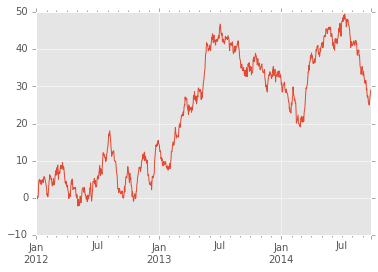

In [357]:
points, start_date = 1000'1/1/2012'
ts = pd.Series(np.random.randn(points), 
               index=pd.date_range(start_date, periods=points))
ts.cumsum().plot()

### I/O
I/O is straightforward with, for example, pd.read_csv or df.to_csv

# Next Steps

**Recommended Resources**

Name | Description
--- | ---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/10min.html) | Wes & Company's selection of tutorials and lectures
[Julia Evans Pandas Cookbook](https://github.com/jvns/pandas-cookbook) | Great resource with examples from weather, bikes and 311 calls
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas